In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
from IPython import display
import time
from scipy.spatial import distance_matrix

# Data visualization

In [2]:
data_train = pd.read_csv('EMGaussian.data', sep=' ', header=None)
data_train.columns=['x','y']
data_test = pd.read_csv('EMGaussian.test', sep=' ', header=None)
data_test.columns=['x','y']


<IPython.core.display.Javascript object>


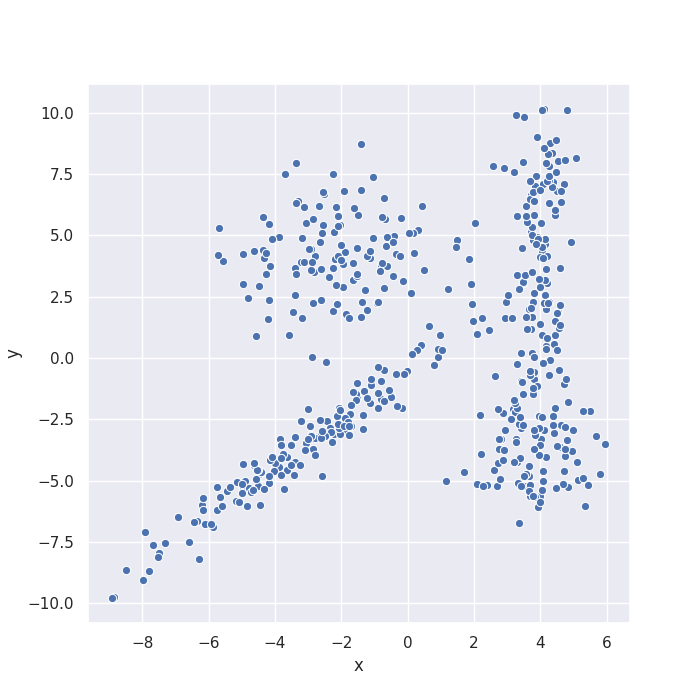

In [3]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="x", y="y", data=data_train)

<IPython.core.display.Javascript object>


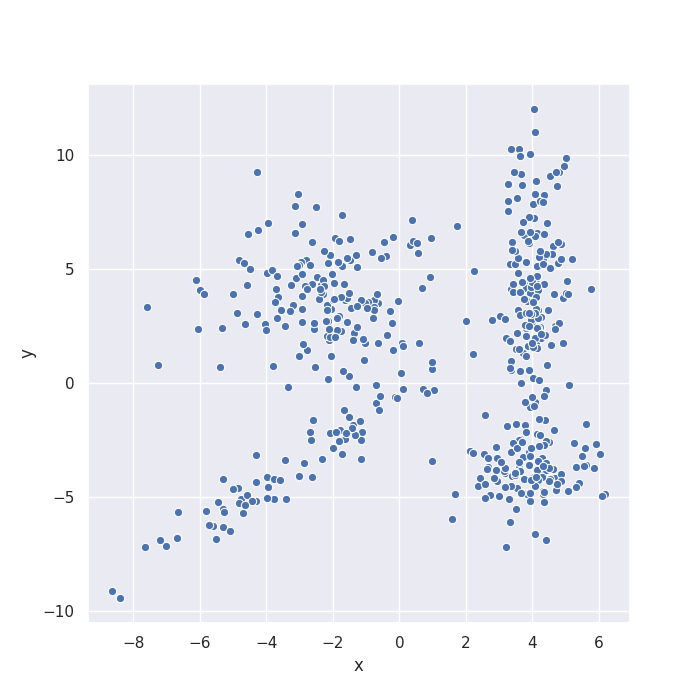

In [4]:
plt.figure(figsize=(7,7))
sns.scatterplot(x="x", y="y", data=data_test)

# K-means

In [5]:
def Jfunc(X, mu, z, k):
    J=0
    for i in range(k):
         J+=np.sum(np.power(np.linalg.norm(X[z==i]-mu[i,:],axis=1),2))
    return J

In [157]:
def kmeans(X, k, eps, display='all', timing=0.4):
    #initialization
    mu = X[np.random.randint(0, X.shape[0],k),:]
    convergence = False
    
    if display=='all':
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.ion()
        ax.clear()
        ax.scatter(x=X[:,0], y=X[:,1], c='red')
        ax.scatter(x=mu[:,0],y=mu[:,1],c='black',marker='X')
        fig.canvas.draw()   # draw
        time.sleep(timing)    #sleep
        fig.show()
        
    j = np.inf

    while not(convergence):
        #optimize over z
        z = np.argmin(distance_matrix(X, mu),axis=1)
        
        if display=='all':
            ax.clear() # - Clear
            sns.scatterplot(x=X[:,0], y=X[:,1], hue=z, palette=sns.color_palette("hls", k))
            fig.canvas.draw()   # draw
            time.sleep(timing)    #sleep
        
        #optimize over mu
        for i in range(0,k):
            mu[i,:] = X[z==i].mean(axis=0)
            
        if display == 'all':
            ax.scatter(x=mu[:,0],y=mu[:,1],c='black',marker='X')
            fig.canvas.draw()   # draw
            time.sleep(timing) 
            
        #convergence evaluation
        if np.abs(j-Jfunc(X, mu, z, k))<eps:
            convergence = True
        else:
            j = Jfunc(X, mu, z, k)
        
        if display == 'all':
            fig.canvas.set_window_title('J: {}'.format(j))
    return mu, z

<IPython.core.display.Javascript object>


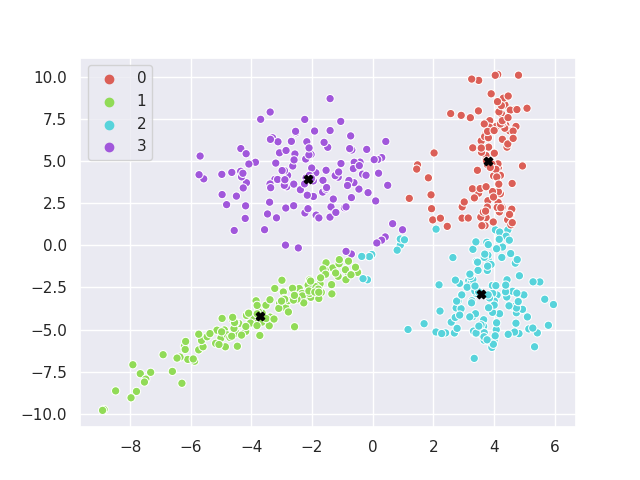

In [158]:
mu, z = kmeans(data_train.values, 4, 0.1, display='all', timing=0.2)